In [19]:
import mne
from mne.datasets import sample
from mne import io
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne.preprocessing import ICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#from MNE tutorial
data_path = sample.data_path()
raw_fname= data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname, preload=True)

In [ ]:
(raw.copy().pick_types(meg='mag')
           .del_proj(0)
           .plot(duration=60, n_channels=100, remove_dc=False))


In [2]:
#now trying to import kai's test data
ROOT = '/home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/'
raw_file=ROOT+"kai-test-2.bdf"
raw=mne.io.read_raw_edf(raw_file,preload=True)

Extracting EDF parameters from /home/dcellier/RDSS/AlphaStudy_Data/eegData/eeg_raw/kai-test-2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1915903  =      0.000 ...  3741.998 secs...


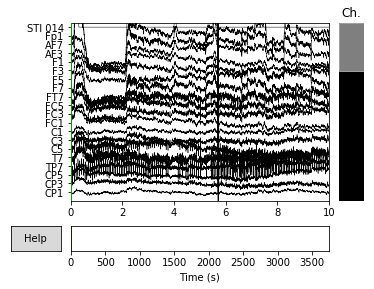

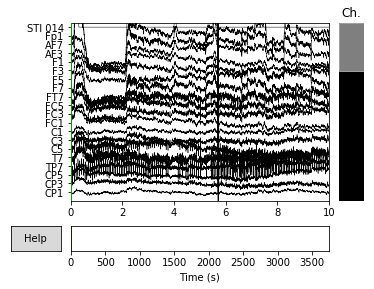

In [3]:
raw.plot()

In [4]:
raw.filter(1,50)

Setting up band-pass filter from 1 - 50 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 1691 samples (3.303 sec) selected


<RawEDF  |  kai-test-2.bdf, n_channels x n_times : 73 x 1915904 (3742.0 sec), ~1.04 GB, data loaded>

In [29]:
raw2=raw.copy()
r1, r2 = mne.set_eeg_reference(raw2,ref_channels=['EXG1','EXG2'])

Applying a custom EEG reference.


In [31]:
r1.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : int | 1539341339
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTyp

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : int | 1539341339
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTy

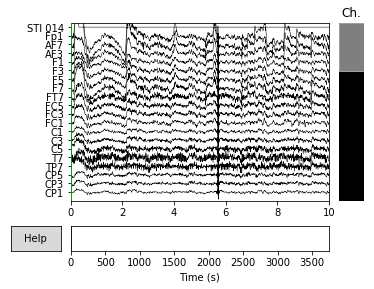

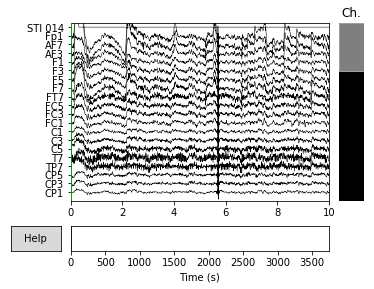

In [7]:
print(raw.info)
raw.plot()

In [8]:
events = mne.find_events(raw, verbose=True)


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1980 events found
Event IDs: [101 103 105 107 109 111 113 115]


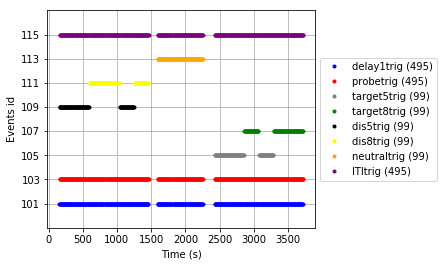

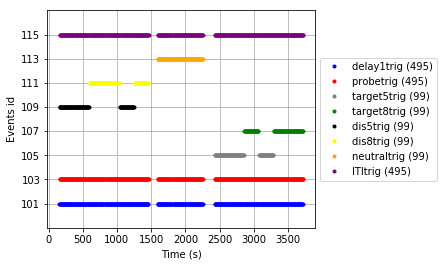

In [9]:
event_id = {'delay1trig':101,'probetrig':103,
            'target5trig':105,'target8trig':107,
            'dis5trig':109,'dis8trig':111,
            'neutraltrig':113,'ITItrig':115}
color= {101:'blue',103:'red',105:'grey',107:'green',
        109:'black',111:'yellow',113:'orange',115:'purple'}
mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,color=color,event_id=event_id)


In [10]:
event_id = {'target5trig':105}#,'target8trig':107} 
tmin, tmax = -0.5, 2  #dont remember the window, making this up
baseline = (None, 0.0)
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin,
                    tmax=tmax)

99 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 20 events and 1281 original time points ...


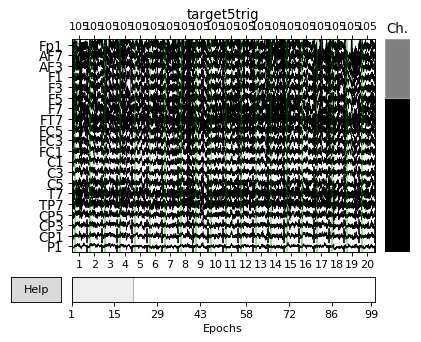

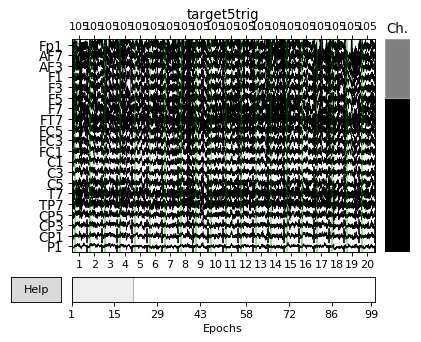

In [13]:
epochs.plot(block=True)

In [14]:
epochs.info


<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, ...
    chs : list | 73 items (EEG: 72, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : int | 1539341339
    nchan : int | 73
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneTy

In [20]:
ica = ICA(n_components=25,random_state=25)


In [23]:
ica.plot_components()

ValueError: Cannot check for channels of type "mag" because info is None